In [1]:
import h5py
import numpy as np
import os
from datetime import datetime
import dascore as dc
import pandas as pd
import random
import seaborn as sns
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import plotly.graph_objects as go

catalog_path = 'ges_catalog'
output_folder = 'data_statistics'
show_images = False
width_mm = 85
dpi = 300
width_in = width_mm / 25.4
height_in = width_in * 0.75

dataframes = []
for file_name in os.listdir(catalog_path):
    file_path = os.path.join(catalog_path, file_name)
    if file_name.endswith('.csv'):
        df = pd.read_csv(file_path)
        if not df.empty:
            dataframes.append(df)

catalog_df = pd.concat(dataframes, ignore_index=True)
catalog_df.columns = catalog_df.columns.str.strip().str.replace(' ', '_')
catalog_df = catalog_df[catalog_df['Depth'] > 0]

catalog_df

,Source,Trig_Date,Trig_Time,Origin_Date,Origin_Time,Profile,Status,Cluster,Y,X,Depth,MomMag,PGV,Stage,P_S/N,S_S/N,Quality,Error,Location,rms_Noise
0,104,8/4/2024,15:43:38.559000,8/4/2024,15:43:38.378010,Primary,2,0,-390.0,2060.0,8240.0,0.69,-1000000.0,5,54.8,139.3,5.8,0.0,Boot msmx,24.57
1,106,8/4/2024,15:44:02.746750,8/4/2024,15:44:02.560144,Primary,2,0,-570.0,2020.0,8270.0,-0.50,-1000000.0,5,5.0,11.3,1.9,0.0,Boot msmx,8.86
2,120,8/4/2024,15:46:05.881000,8/4/2024,15:46:05.699534,Primary,2,0,-110.0,2270.0,8050.0,-0.08,-1000000.0,5,10.4,31.5,3.3,0.0,Boot msmx,12.70
3,122,8/4/2024,15:46:22.258250,8/4/2024,15:46:22.086576,Primary,2,0,-400.0,2120.0,8160.0,-0.39,-1000000.0,5,8.1,22.0,1.9,0.0,Boot msmx,9.00
4,296,8/4/2024,16:11:31.748500,8/4/2024,16:11:31.829006,Primary,2,0,-170.0,2100.0,6700.0,0.13,-1000000.0,5,5.5,3.8,1.7,0.0,Boot msmx,8.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,9976,6/4/2024,06:34:27.039250,6/4/2024,06:34:26.753836,Primary,2,0,-1490.0,2110.0,8000.0,-0.44,0.0,19,3.5,4.4,0.0,0.0,Boot msmx,14.70
2024,9987,6/4/2024,06:34:54.943500,6/4/2024,06:34:55.024849,Primary,2,0,-240.0,2430.0,8670.0,0.84,0.0,19,21.3,27.6,0.0,0.0,Boot msmx,7.48
2025,9990,6/4/2024,06:35:05.046000,6/4/2024,06:35:04.899634,Primary,2,0,40.0,2690.0,6700.0,-0.25,0.0,19,4.5,6.4,0.0,0.0,Boot msmx,8.23
2026,9995,6/4/2024,06:35:16.219500,6/4/2024,06:35:16.059042,Primary,2,0,-150.0,2450.0,7630.0,-0.28,0.0,19,4.8,6.0,0.0,0.0,Boot msmx,7.68


In [2]:
folder_path = 'matched_files'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
dfs = []

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    if not df.empty:
        dfs.append(df)

matched_files = pd.concat(dfs, ignore_index=True).drop_duplicates()
matched_files.columns = matched_files.columns.str.strip()
matched_files.columns = matched_files.columns.str.replace(' ', '_')

matched_files

,Trig_Date,Trig_Time,Matched_File
0,8/4/2024,15:43:38.559000,16B_StrainRate_20240408T154328+0000_44283.h5
1,8/4/2024,15:44:02.746750,16B_StrainRate_20240408T154352+0000_44285.h5
2,8/4/2024,15:46:05.881000,16B_StrainRate_20240408T154604+0000_44296.h5
3,8/4/2024,15:46:22.258250,16B_StrainRate_20240408T154616+0000_44297.h5
4,8/4/2024,16:11:31.748500,16B_StrainRate_20240408T161128+0000_44423.h5
...,...,...,...
158,15/4/2024,16:44:52.433000,16B_StrainRate_20240415T164452+0000_94990.h5
159,15/4/2024,17:38:17.471250,16B_StrainRate_20240415T173816+0000_95257.h5
160,15/4/2024,17:58:28.166750,16B_StrainRate_20240415T175828+0000_95358.h5
161,16/4/2024,10:41:56.954250,16B_StrainRate_20240416T104152+0000_100375.h5


In [3]:
matched_files['MomMag'] = -float('inf')
matched_files['Error'] = -float('inf')
matched_files['rms_Noise'] = -float('inf')

for index, row in matched_files.iterrows():
    time, date = row['Trig_Time'], row['Trig_Date']
    magnitude = catalog_df[(catalog_df['Trig_Time'] == time) & (catalog_df['Trig_Date'] == date)]['MomMag']
    error = catalog_df[(catalog_df['Trig_Time'] == time) & (catalog_df['Trig_Date'] == date)]['Error']
    rms = catalog_df[(catalog_df['Trig_Time'] == time) & (catalog_df['Trig_Date'] == date)]['rms_Noise']
    if not magnitude.empty:
        matched_files.at[index, 'MomMag'] = magnitude.values[0]
        matched_files.at[index, 'Error'] = error.values[0]
        matched_files.at[index, 'rms_Noise'] = rms.values[0]

matched_files

,Trig_Date,Trig_Time,Matched_File,MomMag,Error,rms_Noise
0,8/4/2024,15:43:38.559000,16B_StrainRate_20240408T154328+0000_44283.h5,0.69,0.0,24.57
1,8/4/2024,15:44:02.746750,16B_StrainRate_20240408T154352+0000_44285.h5,-0.50,0.0,8.86
2,8/4/2024,15:46:05.881000,16B_StrainRate_20240408T154604+0000_44296.h5,-0.08,0.0,12.70
3,8/4/2024,15:46:22.258250,16B_StrainRate_20240408T154616+0000_44297.h5,-0.39,0.0,9.00
4,8/4/2024,16:11:31.748500,16B_StrainRate_20240408T161128+0000_44423.h5,0.13,0.0,8.31
...,...,...,...,...,...,...
158,15/4/2024,16:44:52.433000,16B_StrainRate_20240415T164452+0000_94990.h5,-0.61,0.0,10.81
159,15/4/2024,17:38:17.471250,16B_StrainRate_20240415T173816+0000_95257.h5,-0.55,0.0,9.26
160,15/4/2024,17:58:28.166750,16B_StrainRate_20240415T175828+0000_95358.h5,0.17,0.0,9.20
161,16/4/2024,10:41:56.954250,16B_StrainRate_20240416T104152+0000_100375.h5,-0.38,0.0,0.07


In [4]:
selected_events = matched_files.sort_values(by='MomMag', ascending=False).head(10)#.sort_values(by='rms_Noise', ascending=True).head(10)
selected_events = selected_events[selected_events['Error'] < 10]
selected_events = selected_events.sort_values(by='MomMag', ascending=False)

selected_events

,Trig_Date,Trig_Time,Matched_File,MomMag,Error,rms_Noise
0,8/4/2024,15:43:38.559000,16B_StrainRate_20240408T154328+0000_44283.h5,0.69,0.0,24.57
46,10/4/2024,09:23:16.992500,16B_StrainRate_20240410T092316+0000_56782.h5,0.63,0.0,8.68
155,15/4/2024,16:06:54.664250,16B_StrainRate_20240415T160652+0000_94800.h5,0.50,0.0,11.66
114,13/4/2024,12:32:48.714250,16B_StrainRate_20240413T123240+0000_79329.h5,0.36,0.0,13.70
11,8/4/2024,17:19:01.749750,16B_StrainRate_20240408T171852+0000_44760.h5,0.35,0.0,8.20
47,10/4/2024,10:29:48.438000,16B_StrainRate_20240410T102940+0000_57114.h5,0.33,0.0,14.09
122,13/4/2024,13:06:26.237000,16B_StrainRate_20240413T130616+0000_79497.h5,0.28,0.0,22.90
19,9/4/2024,01:43:56.147500,16B_StrainRate_20240409T014352+0000_47285.h5,0.21,0.0,8.66
30,9/4/2024,07:05:31.938250,16B_StrainRate_20240409T070528+0000_48893.h5,0.17,0.0,8.73
110,13/4/2024,12:29:57.405000,16B_StrainRate_20240413T122952+0000_79315.h5,0.17,0.0,13.86


File: 16B_StrainRate_20240408T154328+0000_44283.h5
 Time:  15:43:38.559000
 Date:    8/4/2024
 Magnitude: 0.69
 Error: 0.0
 rms: 24.57


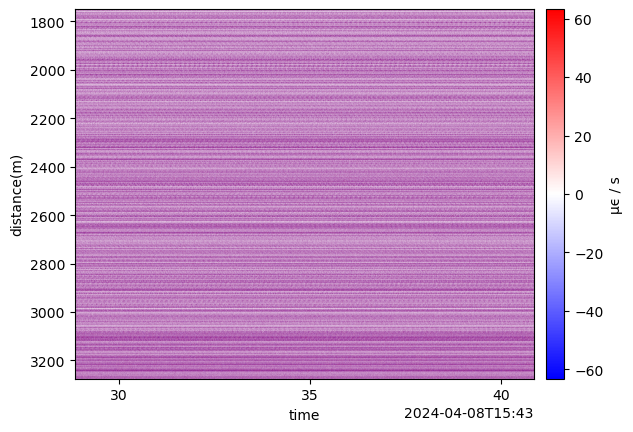

In [5]:
forge_path = '/bedrettolab/E1B/DAS/2024_FORGE/DATA_RAW_fromOpenei/April_2024/v1.0.0'

for index, row in selected_events.iterrows():
    event = row
    time, date = event['Trig_Time'], event['Trig_Date']
    magnitude = event['MomMag']
    error = event['Error']
    rms = event['rms_Noise']
    file_name = event['Matched_File']

    print(f'File: {file_name}\nTime: {time}\nDate: {date}\nMagnitude: {magnitude}\nError: {error}\nrms: {rms}')
    
    file_path = os.path.join(forge_path, file_name)
    try:
        patch = dc.spool(file_path)[0].transpose()
        patch.viz.waterfall(show=True, scale=0.05);
    except Exception as e:
        print(f"Error loading {file_name}: {e}")

    break
    

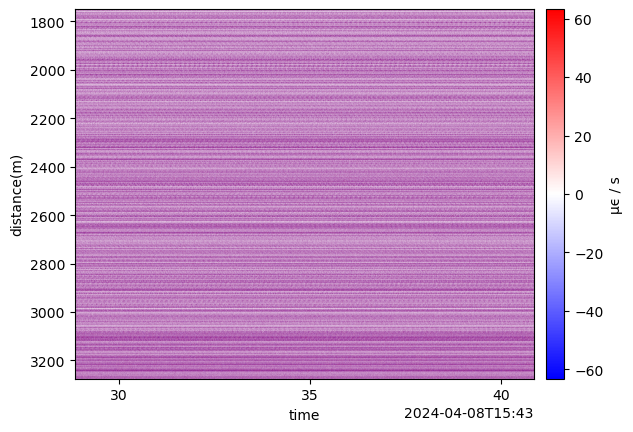

In [7]:
patch.viz.waterfall(show=True, scale=0.05);

Experiments

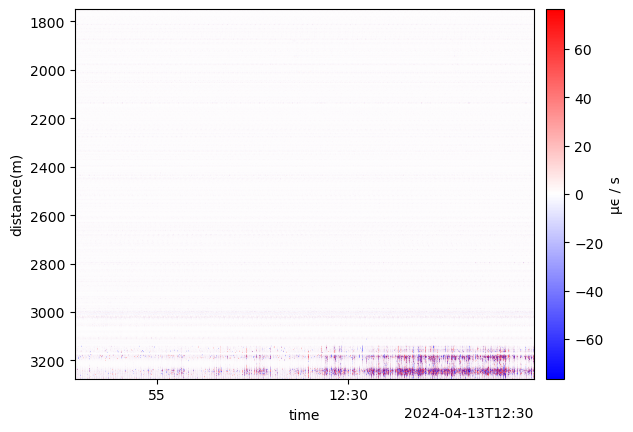

In [ ]:
# patch.viz.wiggle(show=True)
dt = patch.get_coord('time').step
smoothed = patch.rolling(time=50*dt).mean() # average mean
smoothed.viz.waterfall(scale=.1);

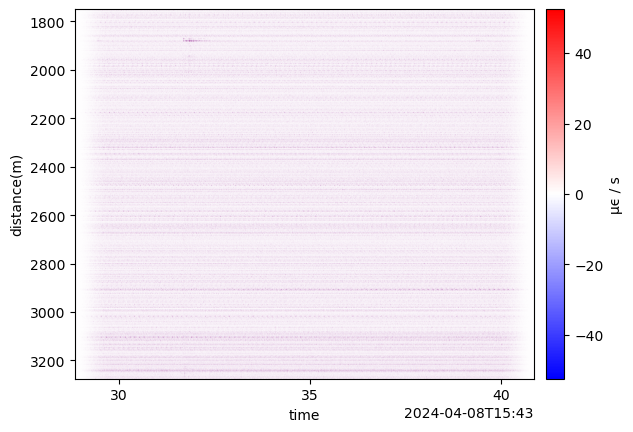

In [9]:
patch_filtered = (
    patch.taper(time=0.075)
    .pass_filter(time=(None, 1000))
)

patch_filtered.viz.waterfall(show=True, scale=0.2);

In [1]:
fk_patch = patch_filtered.dft(patch.dims)

# We can't plot complex arrays so only plot amplitude
ax = fk_patch.abs().viz.waterfall()

NameError: name 'patch_filtered' is not defined